<a href="https://colab.research.google.com/github/Diego251Fagundes/Data-Science-Machine-Learning-Studies/blob/main/Spore_print_color_Toxicidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0) Importação e configurações Globais

In [ ]:
# Importando bibliotecas e definindo configurações globais
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definindo uma semente para reprodutibilidade
RANDOM_STATE = 42
# Configurando a validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# 1) Carregar Dataset

In [ ]:
# Carregando o dataset de cogumelos
df=pd.read_csv('sample_data/mushroom_s6_sporeprint_ohe.csv')
# Separando as features (X) da variável alvo (y)
X = df.drop('class', axis=1)  # Features (todas as colunas, exceto 'class')
y = df['class']  # Variável alvo ('class')

# 2. Divididindo os dados em treino e testes


In [ ]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Imprimindo as formas dos conjuntos de treino e teste
print("Formas:", "X_train", X_train.shape, "| X_test", X_test.shape)
# Verificando a distribuição das classes nos conjuntos de treino e teste
# A variável alvo 'y' contém strings ('e' e 'p'), então usamos value_counts()
print("Distribuição de classes (treino):", y_train.value_counts())
print("Distribuição de classes (teste) :", y_test.value_counts())

Formas: X_train (6499, 9) | X_test (1625, 9)
Distribuição de classes (treino): class
e    3366
p    3133
Name: count, dtype: int64
Distribuição de classes (teste) : class
e    842
p    783
Name: count, dtype: int64


# 3) Implementar um SVM com GridSearchCV, testando diferentes valores de Kernel, C e gamma.


Melhores parâmetros (GridSearch com múltiplos kernels): {'C': 0.1, 'kernel': 'linear'}
Melhor acurácia cross-validation (GridSearch com múltiplos kernels): 86.92%
Acurácia no conjunto de teste (melhor modelo): 86.34%
Preditos (10): ['p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'e']
Reais    (10): ['p' 'p' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'p']


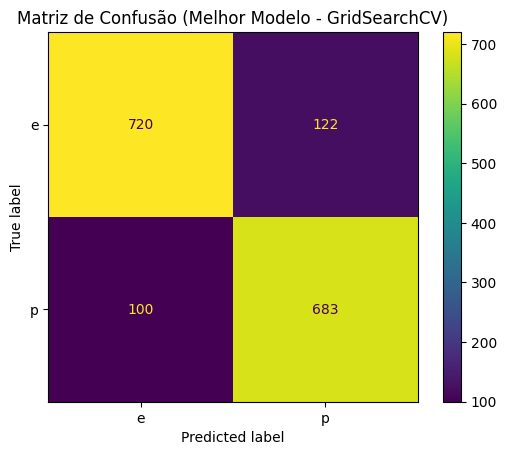

In [ ]:
# Configurando o GridSearchCV para testar diferentes kernels e parâmetros
# Definindo a grade de parâmetros para o GridSearchCV, incluindo diferentes kernels
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}, # Parâmetros para o kernel linear
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 1]}, # Parâmetros para o kernel RBF
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto', 0.1, 1]}, # Parâmetros para o kernel polinomial
    {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 1]} # Parâmetros para o kernel sigmoid
]


# Configurando e executando o GridSearchCV com múltiplos kernels
# n_jobs=-1 utiliza todos os processadores disponíveis
gs = GridSearchCV(
    SVC(random_state=RANDOM_STATE), # Modelo SVM
    param_grid=param_grid, # Grade de parâmetros a serem testados
    cv=cv, # Estratégia de validação cruzada
    scoring='accuracy', # Métrica de avaliação
    n_jobs=-1 # Usar todos os núcleos disponíveis
)
gs.fit(X_train, y_train) # Treinando o GridSearchCV com os dados de treino

# Imprimindo os melhores parâmetros encontrados pelo GridSearchCV
print(f"Melhores parâmetros (GridSearch com múltiplos kernels): {gs.best_params_}")
# Imprimindo a melhor acurácia encontrada durante a validação cruzada
print(f"Melhor acurácia cross-validation (GridSearch com múltiplos kernels): {gs.best_score_*100:.2f}%")

# Avaliando o modelo com os melhores parâmetros no conjunto de teste
best_model = gs.best_estimator_ # Obtendo o melhor modelo treinado
y_pred = best_model.predict(X_test) # Fazendo previsões no conjunto de teste
acc = accuracy_score(y_test, y_pred) # Calculando a acurácia no conjunto de teste
print(f"Acurácia no conjunto de teste (melhor modelo): {acc*100:.2f}%")

# Exibindo alguns exemplos de previsões
print("Preditos (10):", y_pred[:10])
print("Reais    (10):", y_test[:10].values) # Convertendo para numpy array para melhor visualização

# Exibindo a matriz de confusão para o melhor modelo encontrado
# display_labels define os rótulos dos eixos da matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['e', 'p'])
plt.title("Matriz de Confusão (Melhor Modelo - GridSearchCV)") # Título do gráfico
plt.show() # Exibindo o gráfico

#4) Discussão dos resultados, explicando o que foi observado no cenário atribuído.

O Grid Search identificou o kernel linear com C=0.1 como a melhor configuração de SVM para este dataset usando as features de "spore-print-color".
A acurácia obtida com o melhor modelo foi de aproximadamente 86.92% na validação cruzada e 86.34% no conjunto de teste.
A matriz de confusão mostrou que, embora o modelo classifique a maioria dos cogumelos corretamente, ainda existem falsos negativos (100 casos), onde cogumelos venenosos foram classificados como comestíveis.
A presença de falsos negativos sugere que, apesar da boa acurácia geral com as features de cor do pó de esporos, esta característica sozinha pode não ser suficiente para uma classificação completamente segura e confiável para distinguir cogumelos comestíveis de venenosos. Seria necessário considerar outras características do dataset para melhorar a performance e reduzir os falsos negativos.